env : cell2loc_mamba2

In [2]:
import sys
import pickle
import numpy as np
import os


import matplotlib as mpl
from matplotlib import pyplot as plt

# scanpy prints a lot of warnings
import warnings
import cv2 as cv
warnings.filterwarnings('ignore')

import cell2location
import scanpy as sc
import anndata

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs

In [3]:
location_input="/workdir/lt425/202402_stereoseq/nontotal/figures/data/D611/input/"
location_out = "/workdir/lt425/202402_stereoseq/nontotal/figures/data/D611/" 


In [7]:
# Stereoseq h5ad data
import cv2 as cv
import scanpy as sc
adata = sc.read_h5ad('/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/nontotal/D611_analysis/adata_vis_mask.h5ad')

adata

AnnData object with n_obs × n_vars = 4114938 × 56973
    obs: 'x_coordinate', 'y_coordinate', 'total_counts'
    var: 'total'
    uns: 'spatial'
    obsm: 'spatial'

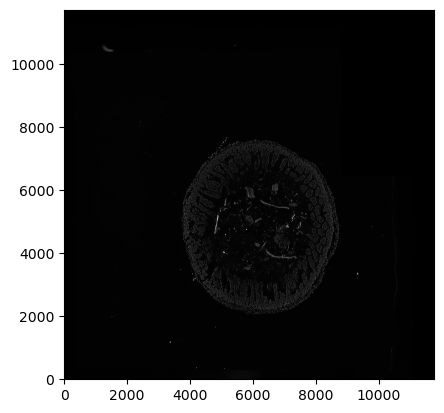

In [17]:
# microscopy image greyscale
ref_img = cv.imread('/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/D611/SAW/result_20240410/03.register/ssDNA_C02927D611_regist.tif', cv.IMREAD_GRAYSCALE)

plt.imshow(ref_img, cmap='gray')#, extent=[0, 12000, 0, 12000])
plt.gca().invert_yaxis()  # y軸の向きを入れ替える
#plt.show()

##  segmented cell to adata

In [27]:
import numpy as np
cellseg_stardist = np.load('/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/D611/SAW/result_20240410/041.cellcut/ssDNA_C02927D611_mask_edm_dis_10.npy')
cellseg_stardist

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

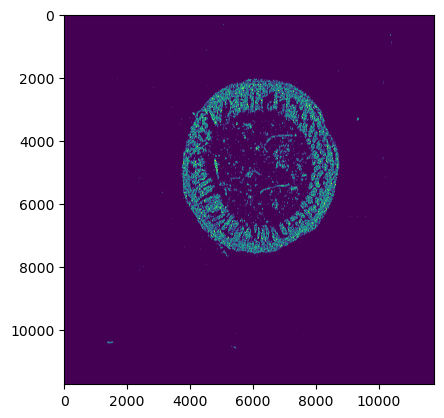

In [28]:
plt.imshow(cellseg_stardist)

In [29]:
cellseg_stardist.max()

20930

In [56]:
cellseg_stardist.shape

(11733, 11753)

In [30]:

cellseg_stardist_xy = [(j, i, cellseg_stardist[i, j]) for i in range(cellseg_stardist.shape[0]) for j in range(cellseg_stardist.shape[1])]
cellseg_stardist_xy

[(0, 0, 0),
 (1, 0, 0),
 (2, 0, 0),
 (3, 0, 0),
 (4, 0, 0),
 (5, 0, 0),
 (6, 0, 0),
 (7, 0, 0),
 (8, 0, 0),
 (9, 0, 0),
 (10, 0, 0),
 (11, 0, 0),
 (12, 0, 0),
 (13, 0, 0),
 (14, 0, 0),
 (15, 0, 0),
 (16, 0, 0),
 (17, 0, 0),
 (18, 0, 0),
 (19, 0, 0),
 (20, 0, 0),
 (21, 0, 0),
 (22, 0, 0),
 (23, 0, 0),
 (24, 0, 0),
 (25, 0, 0),
 (26, 0, 0),
 (27, 0, 0),
 (28, 0, 0),
 (29, 0, 0),
 (30, 0, 0),
 (31, 0, 0),
 (32, 0, 0),
 (33, 0, 0),
 (34, 0, 0),
 (35, 0, 0),
 (36, 0, 0),
 (37, 0, 0),
 (38, 0, 0),
 (39, 0, 0),
 (40, 0, 0),
 (41, 0, 0),
 (42, 0, 0),
 (43, 0, 0),
 (44, 0, 0),
 (45, 0, 0),
 (46, 0, 0),
 (47, 0, 0),
 (48, 0, 0),
 (49, 0, 0),
 (50, 0, 0),
 (51, 0, 0),
 (52, 0, 0),
 (53, 0, 0),
 (54, 0, 0),
 (55, 0, 0),
 (56, 0, 0),
 (57, 0, 0),
 (58, 0, 0),
 (59, 0, 0),
 (60, 0, 0),
 (61, 0, 0),
 (62, 0, 0),
 (63, 0, 0),
 (64, 0, 0),
 (65, 0, 0),
 (66, 0, 0),
 (67, 0, 0),
 (68, 0, 0),
 (69, 0, 0),
 (70, 0, 0),
 (71, 0, 0),
 (72, 0, 0),
 (73, 0, 0),
 (74, 0, 0),
 (75, 0, 0),
 (76, 0, 0),
 (77, 0, 

In [31]:
adata.obsm['spatial']

array([[3642, 4662],
       [3645, 4637],
       [3676, 4647],
       ...,
       [8731, 5834],
       [8727, 5836],
       [8746, 5839]])

In [32]:
# 辞書を作成する
coord_dict = {(item[0], item[1]): item[2] for item in cellseg_stardist_xy}

cell_list = []
for i in range(len(adata.obsm['spatial'])):
    x,y = adata.obsm['spatial'][i]
    target = (x, y)
    value = coord_dict.get(target)
    cell_list.append(value)
cell_list    

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [33]:
adata.obs['segmented_cell'] = cell_list
adata.obs['segmented_cell']

AACAGTCCTAGTGTGTGCTTAGTGC    0
AACCGGTTCAATACTTAGTTTCAGC    0
AAGGTTTGACATCCGTGCTCTTACA    0
AATACTTAGGATTGGCACGCAACAT    0
ACCCGACTCACTCCTTGACTAATTC    0
                            ..
TTCAGATTTCTATGACAATCTTGCT    0
TTCTCCCGCGCTAAGGAGGTAGATG    0
TTGAACATGTGGGCGTTAGGCTGGG    0
TTGGGGTATGTCCGATAAGGAACTA    0
TTTATGTTACTTGTGCATCCAAGAA    0
Name: segmented_cell, Length: 4114938, dtype: int32

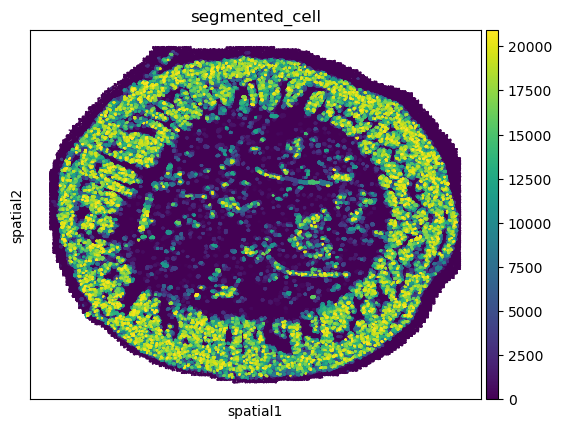

In [34]:
from matplotlib.colors import ListedColormap

sc.pl.embedding(
    adata , 
    basis="spatial", 
    use_raw = False,
    color=['segmented_cell'],
    cmap='viridis',
    show=True,
    na_color= 'grey',
    vmin = 0,
    size = 5
)


## segmentation

In [41]:
from collections import defaultdict

# セルをキーとし、そのインデックスを値とする辞書を作成する
cell_dict = defaultdict(list)
for idx, cell in enumerate(adata.obs['segmented_cell']):
    cell_dict[cell].append(adata.obs['segmented_cell'].index[idx])
#    cell_dict['cell_'+str(cell)].append(adata.obs['segmented_cell'].index[idx])

# キーがセル、値がそのセルが含まれているインデックスのリストの辞書が得られる cannot save...
import json
cell_dict = json.loads(json.dumps(cell_dict))
cell_dict

{'0': ['AACAGTCCTAGTGTGTGCTTAGTGC',
  'AACCGGTTCAATACTTAGTTTCAGC',
  'AAGGTTTGACATCCGTGCTCTTACA',
  'AATACTTAGGATTGGCACGCAACAT',
  'ACCCGACTCACTCCTTGACTAATTC',
  'ACGCCGAACAGTGAGTCATATCCGA',
  'ACTAACTAAATCACTGTTGACCTCC',
  'AGATAGCCTCACACAGCCTTCGCTC',
  'AGCAATCGGTGCCCGGTGGAGGCCC',
  'AGCTACGTACCCCGAGTGGTGATTC',
  'ATACCCGGACTCACGTCACCGAAAC',
  'ATCGACAACTGAGCTACCATTAATT',
  'ATGGGGTCGACTTGATGCGACGTTC',
  'CAACACCTGCGGGAATACCCTGGCT',
  'CACGAATAAAACCGATGCCCATCTA',
  'CAGCCCGCCTAGAGAACAGTGGAGT',
  'CCCCATGGTAGCGACAGTCGTTACG',
  'CCCGTCACACACAGAGGTGATATCG',
  'CCGTAGGGAATACAGGGTTTCCACT',
  'CCTATTGACACATGCTCGATGTAGC',
  'CCTTTTTTTGCCAACCCCGCGCCCT',
  'CGATCTGTTAGAAAACCGAAGTTAT',
  'CGCACCTATCCAATGCTAGCATCGT',
  'CGCGTTAAGCAATTAGCCCACTTGC',
  'CGGTCCCCAACCCATAAGTCCAGTT',
  'CTAAGTACTTGACTCTAAGAGCCTC',
  'CTAGAAAGGCCCGTCTGCGCCCGTA',
  'CTATCCCAAGATGCGCTCGCCGTCA',
  'CTCGGCGAAGGTCAACTAGATGTTA',
  'CTCTTACCTTGGTGCGTATCACCAG',
  'CTTGGCGTCGTCCCGCGATCCGTTG',
  'CTTGTAGGAGTGGAACACGCTCAAT',
  '

In [42]:
cell_dict_len = {key: len(value) for key, value in cell_dict.items()}
cell_dict_len

{'0': 2308033,
 '1686': 123,
 '1447': 196,
 '1850': 81,
 '10813': 63,
 '4417': 54,
 '5844': 68,
 '18575': 88,
 '8586': 71,
 '5890': 115,
 '16470': 58,
 '8720': 43,
 '13240': 74,
 '1301': 118,
 '2020': 76,
 '1859': 98,
 '7902': 66,
 '15749': 37,
 '2536': 121,
 '11975': 79,
 '10591': 68,
 '7597': 139,
 '14405': 66,
 '937': 73,
 '9867': 107,
 '6179': 140,
 '886': 115,
 '2377': 80,
 '10875': 177,
 '20876': 39,
 '3906': 115,
 '1547': 80,
 '826': 18,
 '5531': 71,
 '7543': 74,
 '10377': 65,
 '14051': 21,
 '7009': 142,
 '2231': 82,
 '20242': 43,
 '12814': 113,
 '11731': 145,
 '7171': 102,
 '8607': 63,
 '14161': 70,
 '1141': 140,
 '9766': 55,
 '8732': 77,
 '2208': 116,
 '11027': 106,
 '3417': 92,
 '20265': 76,
 '1700': 80,
 '19592': 107,
 '12596': 92,
 '20019': 124,
 '19716': 33,
 '11099': 83,
 '6306': 91,
 '10657': 46,
 '8003': 79,
 '18836': 28,
 '16524': 51,
 '7146': 80,
 '8571': 81,
 '8077': 85,
 '17585': 71,
 '17760': 106,
 '15044': 49,
 '7070': 143,
 '1593': 111,
 '5820': 54,
 '8150': 106,

In [43]:
import numpy as np
import pandas as pd

# 'segmented_cell' 列の値を数値に変換したものを取得
segmented_cells_num = np.array(adata.obs['segmented_cell'])#pd.factorize(adata.obs['segmented_cell'])[0]

# 各セルの 'segmented_cell' 列の値ごとに adata.X を集計
segmented_cell_aggregated = {}
for cell_type in np.unique(segmented_cells_num):
    # インデックスを取得
    idx = np.where(segmented_cells_num == cell_type)[0]
    # 集計
    aggregated_values = np.array(np.sum(adata.X[idx], axis=0)).flatten()  # 列ごとの合計
    # 結果を格納
    segmented_cell_aggregated[cell_type] = aggregated_values

# 結果を DataFrame に変換
segmented_cell_aggregated_df = pd.DataFrame.from_dict(segmented_cell_aggregated, orient='index', columns=adata.var_names)

# 結果を表示
# 結果を表示
print(segmented_cell_aggregated_df)


       4933401J01RIK  GM26206  XKR4  GM18956  GM37180  GM37363  GM37686  \
0                  0        0     6        0        0        0        0   
1                  0        0     0        0        0        0        0   
3                  0        0     0        0        0        0        0   
4                  0        0     0        0        0        0        0   
5                  0        0     0        0        0        0        0   
...              ...      ...   ...      ...      ...      ...      ...   
20926              0        0     0        0        0        0        0   
20927              0        0     0        0        0        0        0   
20928              0        0     0        0        0        0        0   
20929              0        0     0        0        0        0        0   
20930              0        0     0        0        0        0        0   

       GM1992  GM37329  GM7341  ...  T1LREOM2  T1LREOM2-AS  T1LREOM3  \
0           1        0     

In [44]:
import numpy as np
import pandas as pd

# 'segmented_cell' 列の値を数値に変換したものを取得
segmented_cells_num = np.array(adata.obs['segmented_cell'])#pd.factorize(adata.obs['segmented_cell'])[0]

# 各セルの 'segmented_cell' 列の値ごとに adata.X を集計
segmented_cell_pos = {}
for cell_type in np.unique(segmented_cells_num): #[12628,11368]:#
    # インデックスを取得
    idx = np.where(segmented_cells_num == cell_type)[0]
    # 集計
    aggregated_values = np.mean(adata.obsm['spatial'][idx], axis=0)
    # 結果を格納
    segmented_cell_pos[cell_type] = aggregated_values.astype(int).astype(float)

# 結果を DataFrame に変換
segmented_cell_pos_df = pd.Series(segmented_cell_pos, index=segmented_cell_aggregated_df.index)


print(segmented_cell_pos_df)


0        [6142.0, 4918.0]
1        [8013.0, 3218.0]
3        [6090.0, 4723.0]
4        [5575.0, 3145.0]
5        [5822.0, 3160.0]
               ...       
20926    [8086.0, 6352.0]
20927    [8380.0, 4164.0]
20928    [6829.0, 3863.0]
20929    [7388.0, 6885.0]
20930    [8028.0, 5927.0]
Length: 20825, dtype: object


In [45]:
spatial_bin = np.array([np.array(x) for x in segmented_cell_pos_df.values])
spatial_bin

array([[6142., 4918.],
       [8013., 3218.],
       [6090., 4723.],
       ...,
       [6829., 3863.],
       [7388., 6885.],
       [8028., 5927.]])

In [46]:
adata_bin = anndata.AnnData(X=segmented_cell_aggregated_df.values)
adata_bin.obs.index = segmented_cell_aggregated_df.index
adata_bin.var.index = segmented_cell_aggregated_df.columns
adata_bin.obsm['spatial'] = spatial_bin
adata_bin.uns['bin_info'] = cell_dict
adata_bin

AnnData object with n_obs × n_vars = 20825 × 56973
    uns: 'bin_info'
    obsm: 'spatial'

In [47]:
#adata_vis2 = sc.read_h5ad(outputloc + "cell2loc_singlecell_ovrlap.h5ad")
adata_bin.obs['total_counts'] = adata_bin.X.sum(axis=1)
adata_bin.obs['total_counts']

0        2303109
1            139
3            254
4            519
5            456
          ...   
20926          9
20927          5
20928         14
20929         13
20930         45
Name: total_counts, Length: 20825, dtype: int64

In [48]:
import copy
filtered_obs = adata_bin.obs[~adata_bin.obs.index.isin([0])]
filtered_adata = anndata.AnnData(X=adata_bin.X[~adata_bin.obs.index.isin([0])], obs=filtered_obs, var=adata_bin.var)
uns_temp = copy.deepcopy(adata_bin.uns['bin_info'])
del uns_temp['0']
filtered_adata.uns['bin_info'] = uns_temp 
filtered_adata.obsm['spatial'] = adata_bin.obsm['spatial'][1:]
filtered_adata 

AnnData object with n_obs × n_vars = 20824 × 56973
    obs: 'total_counts'
    uns: 'bin_info'
    obsm: 'spatial'

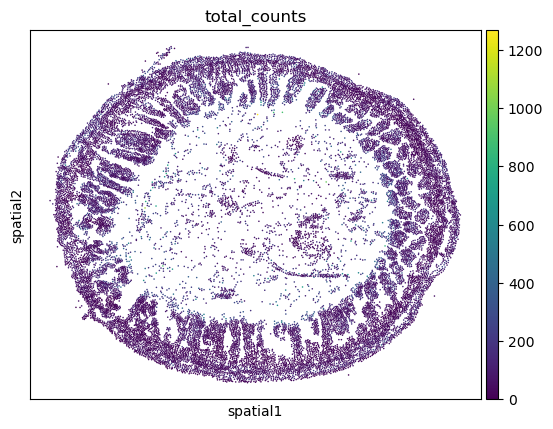

In [49]:
from matplotlib.colors import ListedColormap

sc.pl.embedding(
    filtered_adata  , 
    basis="spatial", 
    use_raw = False,
    color=['total_counts'],
    cmap='viridis',
    show=True,
    na_color= 'grey',
    vmin = 0,
    size = 5
)


# Cell2loc

## total count mask

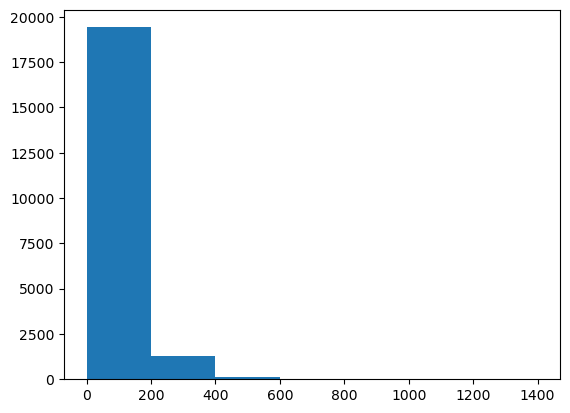

In [53]:
data = filtered_adata.obs['total_counts']
bin_width = 200  # ビンの幅
bins = np.arange(min(data), 
                 max(data) + bin_width, 
                 bin_width)  # ビンの範囲を計算
hist_plot = plt.hist(data, bins=bins)

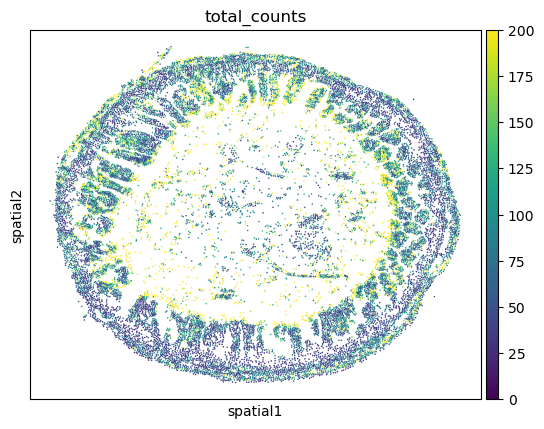

In [55]:
from matplotlib.colors import ListedColormap
thre = 25
sc.pl.embedding(
    filtered_adata[filtered_adata.obs['total_counts'] > thre], 
    basis="spatial", 
    use_raw = False,
    color=['total_counts'],
    cmap='viridis',
    show=True,
    na_color= 'grey',
    vmin = 0,
    vmax = 200,
    size = 5
)


In [56]:
# filter out spots with too few reads
thre = 25
adata_binned_mask = filtered_adata[filtered_adata.obs['total_counts'] > thre]
adata_binned_mask

View of AnnData object with n_obs × n_vars = 17652 × 56973
    obs: 'total_counts'
    uns: 'bin_info'
    obsm: 'spatial'

## Load single cell Reference

In [59]:
#Load single cell Reference 10/08/2023

ref_run_name = "Gut_sc_ref_Josh_cell2loc"
adata_ref = sc.read_h5ad(f"/workdir/lt425/intestine_kurpios/cell2loc_202306_slideseq/{ref_run_name}.h5ad")
adata_ref.var_names = adata_ref.var_names.str.upper()
adata_ref

AnnData object with n_obs × n_vars = 24371 × 8038
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters', 'scMRMA', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'scMRMA_1', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'nonz_mean'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'means_per_cluster_mu_fg', 'q05_per_cluster_mu_fg', 'q95_per_cluster_mu_fg', 'stds_per_cluster_mu_fg'
    obsp: 'distances'

In [60]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
inf_aver

B cells  CD8 T cells  Cholangiocytes  Enteroendocrine cells  \
SOX17            0.001916     0.000387        0.005647               0.007560   
MRPL15           0.063283     0.068079        0.022527               0.152111   
LYPLA1           0.123633     0.151946        0.033312               0.659743   
TCEA1            0.126413     0.124332        0.057691               0.267861   
ATP6V1H          0.068345     0.085773        0.014541               0.152334   
...                   ...          ...             ...                    ...   
MT-CYTB         29.616560    30.539482        4.691960              41.999203   
AC168977.1       0.005395     0.000356        0.004403               0.007610   
CAAA01118383.1   0.027993     0.035335        0.014977               0.118684   
VAMP7            0.013902     0.042826        0.034716               0.267093   
AC149090.1       0.180974     0.262116        0.008816               1.212118   

                Epithelial cells  \
SOX17                   0.001226   
MRPL15                  0.003376   
LYPLA1                  0.013330   
TCEA1                   0.095986   
ATP6V1H                 0.034462   
...                          ...   
MT-CYTB                 4.901431   
AC168977.1              0.001288   
CAAA01118383.1          0.007391   
VAMP7                   0.008055   
AC149090.1              0.011066   

                Erythroid-like and erythroid precursor cells  \
SOX17                                               0.010099   
MRPL15                                              0.038693   
LYPLA1                                              0.213432   
TCEA1                                               0.053499   
ATP6V1H                                             0.021065   
...                                                      ...   
MT-CYTB                                            18.072201   
AC168977.1                                          0.003179   
CAAA01118383.1                                      0.007024   
VAMP7                                               0.018360   
AC149090.1                                          0.020762   

                Glandular epithelial cells  Goblet cells  \
SOX17                             0.002743      0.001898   
MRPL15                            0.017903      0.143091   
LYPLA1                            0.007972      0.665669   
TCEA1                             0.081565      0.134613   
ATP6V1H                           0.022708      0.065204   
...                                    ...           ...   
MT-CYTB                           4.749618     35.997963   
AC168977.1                        0.010256      0.003656   
CAAA01118383.1                    0.005382      0.097239   
VAMP7                             0.009699      0.117771   
AC149090.1                        0.007415      0.287884   

                Immature Enterocytes 1  Macrophages  ...  \
SOX17                         0.000629     0.002200  ...   
MRPL15                        0.304633     0.072164  ...   
LYPLA1                        1.498186     0.155402  ...   
TCEA1                         0.194507     0.126780  ...   
ATP6V1H                       0.126889     0.055151  ...   
...                                ...          ...  ...   
MT-CYTB                      78.006477    23.742832  ...   
AC168977.1                    0.000564     0.002080  ...   
CAAA01118383.1                0.172106     0.023404  ...   
VAMP7                         0.282255     0.024762  ...   
AC149090.1                    0.379752     0.085112  ...   

                Mature Enterocytes 2  Mature Enterocytes 3  \
SOX17                       0.001036              0.001832   
MRPL15                      0.055419              0.066020   
LYPLA1                      0.796880              0.819985   
TCEA1                       0.104779              0.106775   
ATP6V1H                     0.061624              0.025890   
...                          

## Cell2loc

In [62]:
#adata_binned_mask = sc.read_h5ad(outputloc + 'adata_mask_SAW-stardist-seg_bin_25umi.h5ad')
adata_binned_mask

AnnData object with n_obs × n_vars = 17652 × 56973
    obs: 'total_counts'
    uns: 'bin_info'
    obsm: 'spatial'

In [63]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_binned_mask.var_names, inf_aver.index)
adata_vis2 = adata_binned_mask[:, intersect].copy()
inf_aver2 = inf_aver.loc[intersect, :].copy()
intersect

array(['0610005C13RIK', '0610009B22RIK', '0610010K14RIK', ..., 'ZYX',
       'ZZEF1', 'ZZZ3'], dtype=object)

In [64]:
len(intersect)

7914

In [65]:
adata_vis2

AnnData object with n_obs × n_vars = 17652 × 7914
    obs: 'total_counts'
    uns: 'bin_info'
    obsm: 'spatial'

In [66]:
import cell2location
# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis2)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [67]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis2, cell_state_df=inf_aver2,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=1,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.4.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 17652 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 7914  │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [68]:
import gc
gc.collect()

11486

In [69]:
######## taking time ~45m
### check if GPU is available with " $ nvidia-smi "
mod.train(max_epochs=10000,
          # train using full data (batch_size=None)
          batch_size=10000,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
          use_gpu=1,
         )

# plot ELBO loss history during training, removing first 100 epochs from the plot
#mod.plot_history(1000)
#plt.legend(labels=['full data training']);

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 10000/10000: 100%|█████████████████████| 10000/10000 [2:03:10<00:00,  1.38it/s, v_num=1, elbo_train=4e+6]

`Trainer.fit` stopped: `max_epochs=10000` reached.


Epoch 10000/10000: 100%|█████████████████████| 10000/10000 [2:03:10<00:00,  1.35it/s, v_num=1, elbo_train=4e+6]


In [70]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
output_location=outputloc
sample_name = "adata_host_cellsegmented" #+str{thre}+

adata_raw = mod.export_posterior(
    adata_vis2, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': 3}
)

# Save model
#mod.save(f"{sample_name}", overwrite=True)
mod.save(f"{output_location}/{sample_name}", overwrite = True)



# mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

# Save anndata object with results
adata_file = f"{output_location}/{sample_name}.h5ad"
adata_raw.write(adata_file)
adata_file

Sampling global variables, sample: 100%|█████████████████████████████████████| 999/999 [00:17<00:00, 58.34it/s]


'/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/nontotal/D611_analysis/SAWsegmentation//adata_mask_SAW-stardist-seg_bin_25umi_cell2loc_mask25_epoch10000_batch10000.h5ad'

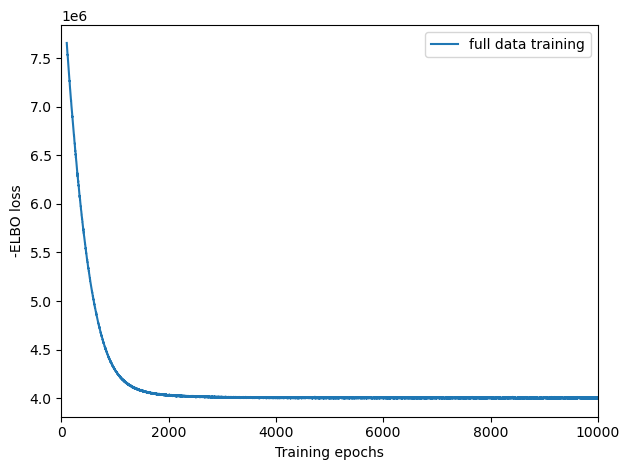

In [71]:
# plot ELBO loss history during training, removing first 100 epochs from the plot
mod.plot_history(100)
plt.legend(labels=['full data training'])

In [ ]:
mod.compute_expected()
mod.plot_posterior_mu_vs_data()

# After cell2loc

In [4]:
adata_hostcell = sc.read_h5ad(location_out + 'adata_host_cellsegmented.h5ad')
adata_hostcell

AnnData object with n_obs × n_vars = 17652 × 7914
    obs: 'total_counts', '_indices', '_scvi_batch', '_scvi_labels', 'cell2loc_dominant'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'bin_info', 'cell2loc_dominant_colors', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [5]:
adata_hostcell.var['total'] = adata_hostcell.X.sum(axis=0).T
adata_hostcell.obs['total_counts'] = adata_hostcell.X.sum(axis=1)

In [6]:
# dominant cell type
## Max portion of host cell
import pandas as pd
data = adata_hostcell.obsm['q05_cell_abundance_w_sf']

dominant_hostcell = pd.Series([data.iloc[i].idxmax() for i in range(len(data))], index=data.index)

adata_hostcell.obs['cell2loc_dominant']=dominant_hostcell 


In [7]:
cell2loc_dominant_2 = []
for i in adata_hostcell.obs['cell2loc_dominant']:
    if str(i) == 'nan':
        cell2loc_dominant_2.append(np.nan)
    elif ('q05cell_abundance_w_sf_Immature Enterocytes 1' in i):
        cell2loc_dominant_2.append('Immature Enterocytes')
    elif ('q05cell_abundance_w_sf_Mature Enterocytes' in i):
        cell2loc_dominant_2.append('Mature Enterocytes')
    elif ('q05cell_abundance_w_sf_pDCs' in i):
        cell2loc_dominant_2.append('Dendritic Cells')
    else:
        cell2loc_dominant_2.append(i.replace('q05cell_abundance_w_sf_','',1))

adata_hostcell.obs['cell2loc_dominant_2'] = cell2loc_dominant_2     

## lumen area

In [14]:
points_inside_lumen = np.loadtxt(location_out+"coordinates_lumen.csv",delimiter=',')
points_inside_tissue = np.loadtxt(location_out+"coordinates_wholetissue.csv",delimiter=',')

In [16]:
import numpy as np
adata = adata_hostcell

points = points_inside_lumen

points_inside_set = set(map(tuple, points))
positions = adata.obsm['spatial'].astype(int)
mask_inside = np.array([tuple(pos) in points_inside_set for pos in positions])
adata.obs['mask_lumen'] = mask_inside


points = points_inside_tissue

points_inside_set = set(map(tuple, points))
positions = adata.obsm['spatial'].astype(int)
mask_inside = np.array([tuple(pos) in points_inside_set for pos in positions])
adata.obs['mask_wholetissue'] = mask_inside

adata.obs['mask_tissue'] = adata.obs['mask_wholetissue']
adata.obs.loc[adata.obs['mask_wholetissue'] & adata.obs['mask_lumen'], 'mask_tissue'] = False

adata_hostcell = adata

In [17]:
adata_hostcell

AnnData object with n_obs × n_vars = 17652 × 7914
    obs: 'total_counts', '_indices', '_scvi_batch', '_scvi_labels', 'cell2loc_dominant', 'cell2loc_dominant_2', 'mask_lumen', 'mask_wholetissue', 'mask_tissue'
    var: 'total'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'bin_info', 'cell2loc_dominant_colors', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [18]:
adata_hostcell.write(location_out + 'adata_host_cellsegmented.h5ad')
